# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:**Shiva Mahitra Bagindo
- **Email:** M312B4KX4145@bangkit.academy
- **ID Dicoding:** shivamahira

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana Kecepatan angin mempengaruhi tingkat penyewaan sepeda
- Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap penyewaan sepeda

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
# Unggah file
uploaded = files.upload()

Saving hour.csv to hour.csv


In [4]:
data = pd.read_csv('hour.csv')
data.head(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Dapat ditemukan informasi pengaruh waktu, cuaca, dan tipe hari terhadap pola penyewaan sepeda.
- Dataset ini berisi data sewa sepeda (berdasarkan kolom cnt yang menunjukkan total penyewaan) dengan rentang waktu yang mencakup hari, bulan, jam, dan musim.

### Assessing Data

In [5]:
# Menampilkan informasi umum data
data.info()
# Memeriksa nilai yang hilang
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak ada nilai yang hilang atau kosong dalam dataset ini
- Dataset ini lengkap dan siap digunakan untuk analisis lanjutan

### Cleaning Data

In [6]:
# Tidak perlu pembersihan data karena tidak ada missing value.

**Insight:**
- tidak ada missing value sehingga dapat dilakukan analisis lebih lanjut


## Exploratory Data Analysis (EDA)

### Explore Korelasi faktor Kecepatan Angin dan Penyewaan Sepeda

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


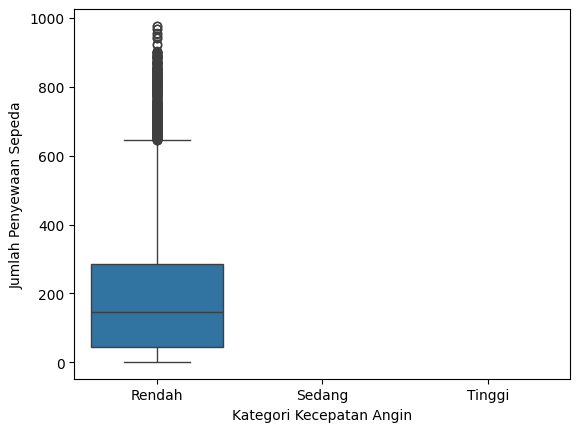

In [9]:
# Membuat kategori kecepatan angin
bins = [0, 5, 10, 15]
labels = ['Rendah', 'Sedang', 'Tinggi']
data['windspeed_cat'] = pd.cut(data['windspeed'], bins=bins, labels=labels)

sns.boxplot(x='windspeed_cat', y='cnt', data=data)
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Dari visualisasi boxplot ini, dapat disimpulkan bahwa kecepatan angin memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.
- terdapat korelasi negatif antara kecepatan angin dan jumlah penyewaan sepeda. Artinya, semakin tinggi kecepatan angin, cenderung semakin sedikit jumlah sepeda yang disewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Kecepatan angin mempengaruhi tingkat penyewaan sepeda

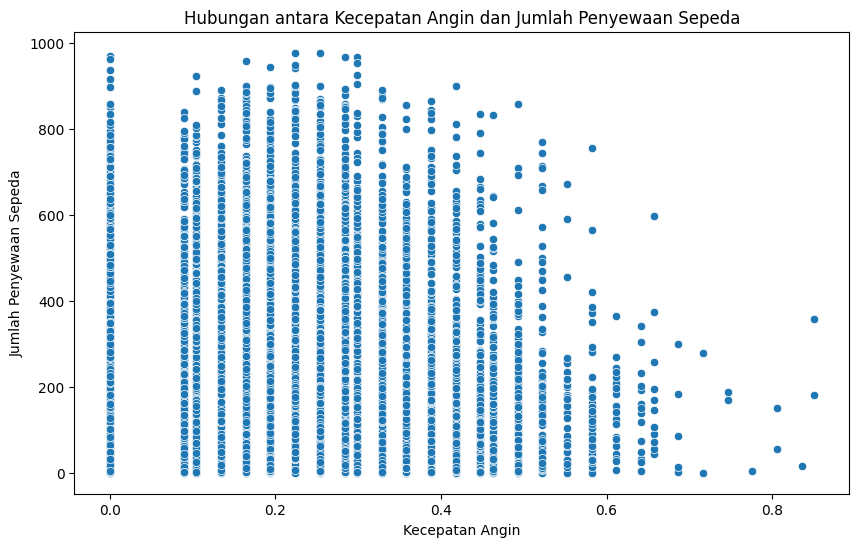

In [10]:
# Visualisasi 1: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=data)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Secara umum, terlihat adanya tren negatif yang cukup jelas. Artinya, semakin tinggi kecepatan angin, cenderung semakin sedikit jumlah sepeda yang disewa. Hal ini mengindikasikan bahwa cuaca yang berangin kurang disukai oleh pengguna sepeda.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap penyewaan sepeda

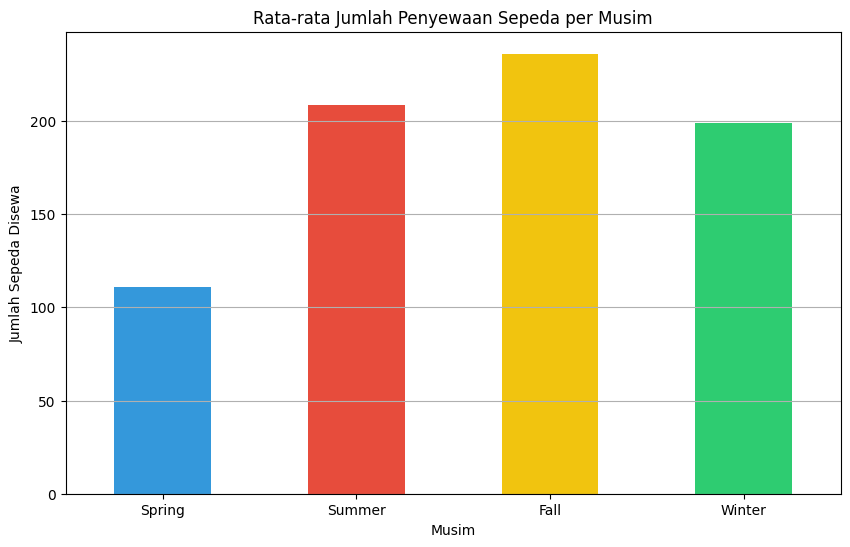

In [14]:
# Hitung rata-rata jumlah penyewaan per musim
season_counts = data.groupby('season')['cnt'].mean()

# Visualisasi dengan warna yang berbeda untuk setiap batang
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color=['#3498db', '#e74c3c', '#f1c40f', '#2ecc71'])  # Warna-warna yang berbeda
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sepeda Disewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.grid(axis='y')
plt.show()

**Insight:**
- Terlihat jelas bahwa rata-rata jumlah penyewaan sepeda pada musim gugur jauh lebih tinggi dibandingkan dengan musim lainnya. Ini mengindikasikan bahwa pada musim gugur, banyak orang lebih memilih untuk menyewa sepeda dibandingkan dengan musim-musim lainnya.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : kecepatan angin memberikan pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Semakin tinggi kecepatan angin, semakin sedikit orang yang memilih untuk menyewa sepeda. Ini menunjukkan bahwa cuaca yang berangin kurang disukai oleh pengguna sepeda.
- Conclution pertanyaan 2 : Musim gugur merupakan musim dengan permintaan tertinggi, diikuti oleh musim panas. Hal ini mengindikasikan bahwa faktor cuaca, seperti suhu yang lebih hangat dan cerah, sangat mempengaruhi minat masyarakat untuk bersepeda.